Found 2667 images belonging to 7 classes.
Found 663 images belonging to 7 classes.
Found 3330 images belonging to 7 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,696,455 (105.65 MB)

 Trainable params: 12,980,231 (49.52 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.2640 - loss: 2.5774 - val_accuracy: 0.3937 - val_loss: 1.5730
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.4502 - loss: 1.7007 - val_accuracy: 0.4917 - val_loss: 1.3958
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.5181 - loss: 1.4942 - val_accuracy: 0.5324 - val_loss: 1.2733
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.5493 - loss: 1.4042 - val_accuracy: 0.5837 - val_loss: 1.1659
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.5873 - loss: 1.2965 - val_accuracy: 0.5611 - val_loss: 1.2840
Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 837s 10s/step - accuracy: 0.5917 - loss: 1.2346 - val_accuracy: 0.6305 - val_loss: 1.0335
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 824s 10s/step - accuracy: 0.6717 - loss: 0.9694 - val_accuracy: 0.5882 - val_loss: 1.1514
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 840s 10s/step - accuracy: 0.7123 - loss: 0.8626 - val_accuracy: 0.6486 - val_lo

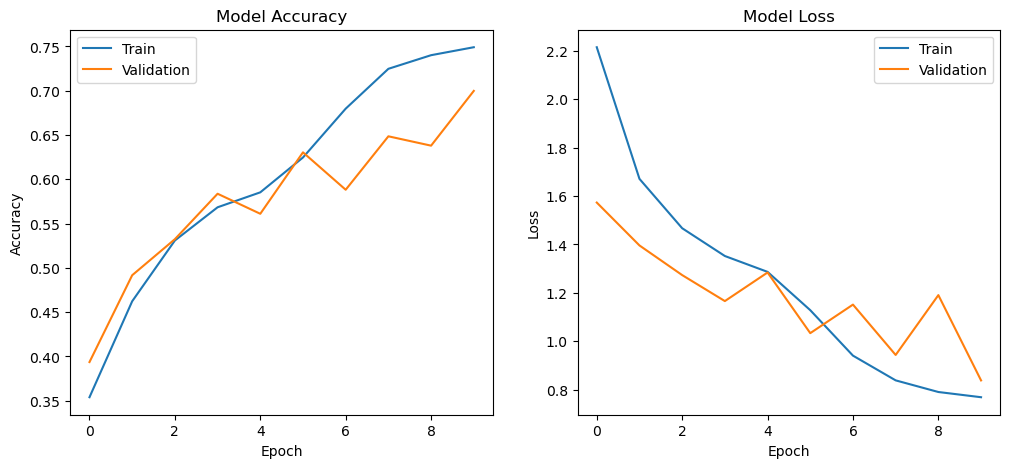

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

# Create directory for saving weights if it doesn't exist
os.makedirs('./weights', exist_ok=True)

# Data augmentation and rescaling for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the training data for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    r'C:\Users\ASUS\Desktop\Dataset',  # Path to training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Training subset
    shuffle=True
)

# Validation data generator (use validation subset from the training data)
validation_generator = datagen.flow_from_directory(
    r'C:\Users\ASUS\Desktop\Dataset',  # Path to training data (same as training directory)
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Validation subset
    shuffle=True
)

# Test data generator (for actual testing, not validation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\ASUS\Desktop\Dataset',  # Path to test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG16 model (without top layers)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Build model on top of VGG16
model = Sequential([
    vgg_base,  # Pre-trained VGG16 base
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),  # Batch normalization for improved training
    Dropout(0.5),
    Dense(256, activation='relu'),  # Extra dense layer
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 categories of waste
])

# Print model summary
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Use Adam optimizer with learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Initial training (with frozen VGG16 layers)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

# Fine-tuning: Unfreeze the last few layers of the VGG16 model
for layer in vgg_base.layers[-15:]:  # Unfreeze the last 15 layers
    layer.trainable = True

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model's weights after fine-tuning
  # Save the weights

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'])
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'])
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


In [16]:
# Save the model's weights after fine-tuning
model.save_weights('./weights/modelnew.weights.h5')  # Ensure the filename ends with `.weights.h5`

